In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd




from data_personal_example import transaction_data_file, block_data_file,  \
large_pre_gas_prices_file, suite_spot_txn, suite_spot_blx, new_post_eip_txn, \
new_post_eip_blx, new_post_eip_rcpts





#post eip later on
post_eip_later_txn=pd.read_csv(new_post_eip_txn)
post_eip_later_blx=pd.read_csv(new_post_eip_blx)
post_eip_later_rpcts=pd.read_csv(new_post_eip_rcpts)


#post eip day 1
post_eip_d1_txn=pd.read_csv(transaction_data_file)
post_eip_d1_blx=pd.read_csv(block_data_file)


#pre eip gas prices
large_pre_gas_prices=list(pd.read_csv(large_pre_gas_prices_file).gas_price)

max fee =7.764638163754418e+20, gas=1.9705878443021624e+21


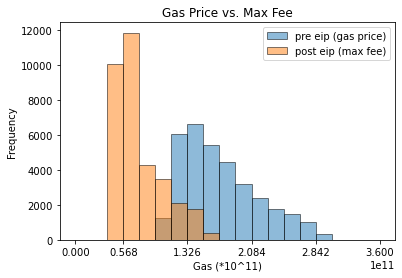

In [5]:







my_txns=post_eip_d1_txn[pd.notnull(post_eip_d1_txn.max_priority_fee_per_gas)]
#df[pd.notnull(df.column_of_interest)]

max_fee=list(my_txns.max_fee_per_gas)

fee_up=np.percentile(max_fee,95)
fee_lo=np.percentile(max_fee,10)
max_fee=[x for x in max_fee if (x < fee_up) & (x > fee_lo)]

my_up=np.percentile(large_pre_gas_prices,95)
my_lo=np.percentile(large_pre_gas_prices,10)
my_post_gas=[x for x in large_pre_gas_prices if (x < my_up) & (x > my_lo)]


def random_index_generator(my_list,num_of_indexes):
    
    my_max=len(my_list)-1
    result=np.random.uniform(0,my_max,num_of_indexes)
    return [round(x) for x in result]

my_index=random_index_generator(my_post_gas,33940)

my_post_gas=[my_post_gas[x] for x in my_index]



fig = plt.figure()
ax = plt.axes()
my_bins=np.linspace(0, 360000000000,20)

x_ticks=[my_bins[0],round(my_bins[3]),\
round(my_bins[7]),round(my_bins[11]),round(my_bins[15]),my_bins[19]]

plt.hist(my_post_gas,bins=my_bins,label='pre eip (gas price)',alpha=0.5,ec='black')
plt.hist(max_fee,bins=my_bins, label='post eip (max fee)',alpha=0.5,ec='black')
plt.xticks(x_ticks)
ax.set_title('Gas Price vs. Max Fee')
ax.set_xlabel('Gas (*10^11)')
ax.set_ylabel('Frequency')
plt.legend()

plt.savefig('gas_price_v_max_fee.png')

print('max fee =' + str(np.var(max_fee)) + ', gas=' + str(np.var(my_post_gas)))
#print(len(max_fee))

In [3]:
#display(my_txns)

#Get the block number and gas limits and base fee from the dataset
my_block_number=list(post_eip_d1_blx.block_number)
my_gas_limit=list(post_eip_d1_blx.gas_limit)
my_base_fee=list(post_eip_d1_blx.base_fee_per_gas)
#initialize a dictionary to assign gas limits and base fee to the transaction data
gas_limit_tracker={}
base_fee_tracker={}


#makes a dicionary with the key being the block number and the 
#value being the gas limits and base fee, because this will allow us to 
#easily assign a gas limit and base fee to the transaction going forward
for i in range(len(my_block_number)):
    gas_limit_tracker[my_block_number[i]]=my_gas_limit[i]
    base_fee_tracker[my_block_number[i]]=my_base_fee[i]
    
    
##get the block numbers from the transaction data
transaction_block_numbers=list(my_txns.block_number)


#initialize a list for the purpose of saving the gas limits that will 
#be assigned to the transaction data and assign the correct information
gas_limits_for_transaction_data=[gas_limit_tracker[x] for x in transaction_block_numbers]
base_fee_for_transaction_data=[base_fee_tracker[x] for x in transaction_block_numbers]

    
#add the column into the dataframe
#transaction_data['gas_limit']=gas_limits_for_transaction_data
my_txns['base_fee']=base_fee_for_transaction_data
my_txns['base_fee_plus_tip']=my_txns['base_fee']+my_txns['max_priority_fee_per_gas']
display(my_txns)

/var/folders/l8/p0_hwx4d2hvbqs4crpsfjlzc0000gn/T/ipykernel_2788/2399310408.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_txns['base_fee']=base_fee_for_transaction_data
/var/folders/l8/p0_hwx4d2hvbqs4crpsfjlzc0000gn/T/ipykernel_2788/2399310408.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_txns['base_fee_plus_tip']=my_txns['base_fee']+my_txns['max_priority_fee_per_gas']


,hash,block_number,value,gas,gas_price,max_fee_per_gas,max_priority_fee_per_gas,transaction_type,gas_used,base_fee,base_fee_plus_tip
77,0xb694a24da8824d6971cc9566a94a12eb4840744a41ff...,12965401,0.000000e+00,2000000,164476296532,2.477601e+11,6.950232e+10,2,655016,94973980561,1.644763e+11
113,0xd446779806b1d7872274d5a96d4467e19061f91afd08...,12965401,0.000000e+00,575000,137641981761,1.376420e+11,1.376420e+11,2,256690,94973980561,2.326160e+11
131,0xcacc3b9c1183d295035426cad5f2b3c3592d6f5bc8bc...,12965401,0.000000e+00,600000,117000000000,1.170000e+11,1.170000e+11,2,228615,94973980561,2.119740e+11
139,0xb5e82901711d56cc1ed71b53bedab13f736a147f1aec...,12965401,9.000000e+16,181878,114492439218,2.227327e+11,1.951846e+10,2,180284,94973980561,1.144924e+11
161,0xa8cb186ede094e2bc472aceb64ff8a9a53da4becc67f...,12965401,0.000000e+00,21000,107102601947,2.210714e+11,1.212862e+10,2,21000,94973980561,1.071026e+11
...,...,...,...,...,...,...,...,...,...,...,...
883769,0xec1a176e7a2cc37389bf2ff27a169a240f1734c33a08...,12969997,2.804744e+16,3000000,29635881520,2.963588e+10,0.000000e+00,2,121233,29635881520,2.963588e+10
883770,0x31eca90accfcb17e2d85dfc6418d420988067bf856e6...,12969997,0.000000e+00,1000000,34505402509,3.450540e+10,3.450540e+10,2,210545,29635881520,6.414128e+10
883837,0xfa623209d41ba4409537b5739d4fa0abbefd687313c2...,12969997,4.109970e+15,42000,31502952651,3.150295e+10,1.867071e+09,2,21000,29635881520,3.150295e+10
883853,0xeb54da76c9059da24af786d1dc97f76da7faebbc9e97...,12969998,0.000000e+00,1000000,165487905007,1.654879e+11,1.654879e+11,2,122846,28080959215,1.935689e+11


max fee =4.1648811997282035e+20, gas=1.9686072523300757e+21


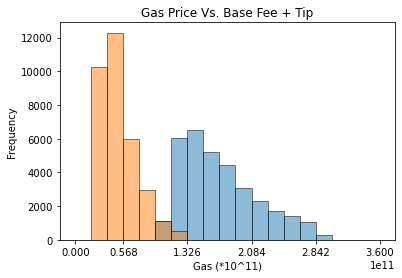

In [4]:
my_tip=list(my_txns.base_fee_plus_tip)

fig = plt.figure()
ax = plt.axes()


tip_hi=np.percentile(my_tip,95)
tip_lo=np.percentile(my_tip,10)
my_tip=[x for x in my_tip if (x < tip_hi) & (x > tip_lo)]


my_up=np.percentile(large_pre_gas_prices,95)
my_lo=np.percentile(large_pre_gas_prices,10)
my_post_gas=[x for x in large_pre_gas_prices if (x < my_up) & (x > my_lo)]


my_index=random_index_generator(my_post_gas,33157)

my_post_gas=[my_post_gas[x] for x in my_index]

#print(len(my_post_gas))

my_bins=np.linspace(0, 360000000000,20)
x_ticks=[my_bins[0],round(my_bins[3]),\
round(my_bins[7]),round(my_bins[11]),round(my_bins[15]),my_bins[19]]



plt.hist(my_post_gas,bins=my_bins,alpha=0.5,label='gas price',ec='black')
plt.hist(my_tip,bins=my_bins,alpha=0.5,label='base fee ',ec='black')
ax.set_title('Gas Price Vs. Base Fee + Tip')
ax.set_xlabel('Gas (*10^11)')
ax.set_ylabel('Frequency')
plt.xticks(x_ticks)

#plt.savefig('gas_price_v_base_fee_plus_tip.png')

print('max fee =' + str(np.var(my_tip)) + ', gas=' + str(np.var(my_post_gas)))